# The Percepron

## Libraries

In [1]:
import torch
import matplotlib.pyplot as plt

## Exercice 1

<div class="alert alert-block alert-info">

The **perceptron** is a single neuron (as illustrated below) which acts as a binary classifier.

<img src="files/figures/perceptron.jpg" width="300px"/>
    
It dynamics is given as follows:

$$
y = \sigma \left( \boldsymbol{w}^T \boldsymbol{x} + b \right) = 
\begin{cases}
+1 \text{, if } \boldsymbol{w}^T \boldsymbol{x} + b \geq 0 \\
-1 \text{, if } \boldsymbol{w}^T \boldsymbol{x} + b < 0.
\end{cases}
$$

where:
- $\boldsymbol{x} = (x_1, \dots, x_M)$ is the *inputs*,
- $\boldsymbol{w} = (w_1, \dots, w_M)$ are the *(synaptic) weights* and $b$ is the *bias*,
- $y$ is the *output*.

By convention, we will use the following notations:
- $\boldsymbol{x} := (1, x_1, \dots, x_M)$
- $\boldsymbol{w} := (w_0, w_1, \dots, w_M)$, where $w_0 = b$.

Accordingly, the dynamics of the perceptron is given by:

$$
y = \sigma \left( \boldsymbol{w}^T \boldsymbol{x} \right).
$$

</div>

<div class="alert alert-block alert-info">

Consider the training set

$$
S = \left\{ \left( \boldsymbol{x_k}, y_k \right) \in \mathbb{R}^M \times \{ -1, +1 \} : k = 1, \dots, K \right\}.
$$


The **training algorithm** of the perceptron consists in finding the weights and bias
    
$$
\boldsymbol{\hat w} := (\hat w_1, \dots, \hat w_M, \hat b)
$$

such that the training set is classified correctly, i.e.,
    
$$
\sigma \left( \boldsymbol{\hat w}^T \boldsymbol{x_k} \right) = y_k \text{ for all } k = 1, \dots, K.
$$

The **training algorithm** works as follows:

Start with $\boldsymbol{w} = (0, 0, \dots, 0)$;<br>
For $e = 1, \dots, nb\_epochs$:<br>
&nbsp; For $k = 1, \dots, K$:<br>
&nbsp; &nbsp; If $(\boldsymbol{x_k}, y_k)$ is misclassified, i.e., $\sigma \left( \boldsymbol{\hat w}^T \boldsymbol{x_k} \right) \neq y_k$:<br>
&nbsp; &nbsp; &nbsp; Then update the weights: $\boldsymbol{w} := \boldsymbol{w} + y_k \boldsymbol{x_k}$.
    
</div>

<div class="alert alert-block alert-info">

**Remark:**
- The equation $\boldsymbol{\hat w}^T \boldsymbol{x} = 0$ represents a *hyperplan* in the input space $\mathbb{R}^M$.
- The weights $\boldsymbol{\hat w}$ represents the *normal vector* or *parameters* of this hyperplan.
- Therefore, the training algorithm of the perceptron consists in finding a hyperplan that separates the data correctly.
</div>

Generate $K = 100$ training points $(\boldsymbol{x_k}, y_k),~ k = 1, \dots, K$ in $\mathbb{R}^2 \times \{ -1, +1 \}$ that are *linearly separable*.

- The "positive" ("negative") points $\boldsymbol{x_k},~ k = 1, \dots, K$ are stored in a tensor `x_pos` (`x_neg`) of dim $K \times 2$.
- The "positive" ("negative") labels $y_k,~ k = 1, \dots, K$ are stored in a tensor `y_pos` (`y_neg`) of dim $K$.

For instance, you can generate your points with `torch.normal(...)`, using different means and stds for two the different classes.

Plot your training points using `matplolib`.

In [2]:
def create_dataset(K):

    x_pos = torch.normal(mean=12, std=3, size=(K//2, 2))
    y_pos = torch.ones(K//2)

    x_neg = torch.normal(mean=1, std=2.2, size=(K//2, 2))
    y_neg = torch.ones(K//2) * -1
    
    return x_pos, y_pos, x_neg, y_neg

In [3]:
K = 100

x_pos, y_pos, x_neg, y_neg = create_dataset(K)

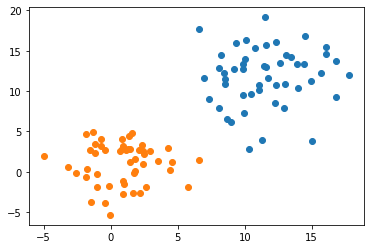

In [4]:
plt.scatter(x_pos[:, 0], x_pos[:, 1])
plt.scatter(x_neg[:, 0], x_neg[:, 1])

Create a function `plot_dataset(x_pos, y_pos, x_neg, y_neg, w)` which:
- plots the "positive" points `x_pos` and the "negative" points `x_neg` in different colors; 
- plots the hyperplan $\boldsymbol{w}^T \boldsymbol{x} = 0$ parametrized by `w` (where `w = (w_1, w_2, b)`). 

In [5]:
def plot_dataset(x_pos, y_pos, x_neg, y_neg, w, 
                 filename='figures/training.pdf'):
    
    plt.scatter(x_pos[:, 0], x_pos[:, 1], s=16, label='positive points')
    plt.scatter(x_neg[:, 0], x_neg[:, 1], s=16, label='negative points')
    
    # w_0 + w_1x_1 + w_2x_2 = 0, where w_0 = b
    # => x_2 = (-w_0 - w_1x_1) / w_2
    x = torch.arange(-10, 20, 0.5)
    y = (- w[0] - w[1]*x) / w[2]
    plt.plot(x, y, color='black', label= "hyperplan")
    
    plt.xlim(-8, 20)
    plt.ylim(-8, 20)
    
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig(filename)

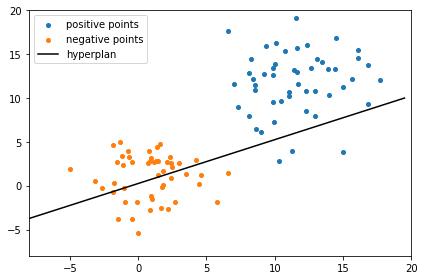

In [6]:
plot_dataset(x_pos, y_pos, x_neg, y_neg, [1, 2, -4])

Merge yours training points `x_pos`, `y_pos` and `x_neg`, `y_neg` into a single **shuffled training set** `x`, `y`.

To shuffle, use `torch.randperm(...)`

In [7]:
x = torch.row_stack([x_pos, x_neg])
y = torch.cat([y_pos, y_neg])

dataset = torch.column_stack([x, y])
dataset = dataset[torch.randperm(x.shape[0]), :]

x, y = dataset[:, :-1], dataset[:, -1]
x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100]))

Create a function `train_perceptron(x, y, nb_epochs)` that implements the training algorithm of the perceptron on the training set `x`, `y`.

The parameter `nb_epochs` makes the algo stops after `nb_epochs` passes of the training set.

The function should return the parameters `w = (w_1, w_2, b)` of the hyperplan obtained after training.

Apply the function to your training set `x`, `y`.

In [8]:
def train_perceptron(x, y, nb_epochs):
    
    # modified inputs (extend x with a column of 1's)
    x_tmp = torch.ones((x.shape[0], x.shape[1] + 1))
    x_tmp[:, 1:] = x
    
    # initial weights
    w = torch.zeros(x.size(1) + 1)
    
    # iterate over epochs
    for e in range(nb_epochs):
        
        nb_changes = 0
        
        # iterate over train set
        for i in range(x.shape[0]):
            
            if w.dot(x_tmp[i]) * y[i] <= 0:
                
                w = w + (y[i] * x_tmp[i, :])
                nb_changes = nb_changes + 1
                
        if nb_changes == 0:
        
            break
            
    return w

In [9]:
w_opt = train_perceptron(x, y, nb_epochs_max=15)
w_opt

tensor([-33.0000,   4.6087,   0.7425])

Plot your training set as well as the best hyperplan returned by `train_perceptron` (use your function `plot_dataset`). 

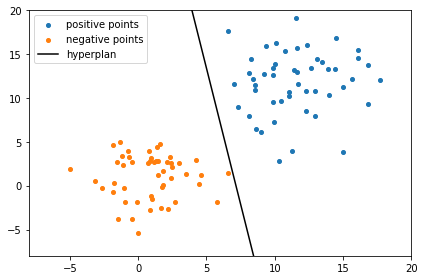

In [10]:
plot_dataset(x_pos, y_pos, x_neg, y_neg, w_opt, 
             "figures/training_final.pdf")

Modify your function `train_perceptron(x, y, nb_epochs)` so that it returns the list of all hyperplans (paramters `w`) encountered during training.

Retrain your perceptron on the train set.

Plot some of the hyperplans (5 or 10 of them) encountered during training.

In [11]:
def train_perceptron_bis(x, y, nb_epochs_max):
    
    # modified inputs (extend x with a column of 1's)
    x_tmp = torch.ones((x.shape[0], x.shape[1] + 1))
    x_tmp[:, 1:] = x
    
    # initial weights
    w = torch.zeros(x.size(1) + 1)
    w_l = [w]
    
    # iterate over epochs
    for e in range(nb_epochs_max):
        
        nb_changes = 0
        
        # iterate over train set
        for i in range(x.shape[0]):
            
            if w.dot(x_tmp[i]) * y[i] <= 0:
                w = w + (y[i] * x_tmp[i, :])
                w_l.append(w)
                nb_changes = nb_changes + 1
                
        if nb_changes == 0:
        
            break
            
    return w_l

In [12]:
w_opt_l = train_perceptron_bis(x, y, nb_epochs_max=15)
len(w_opt_l)

54

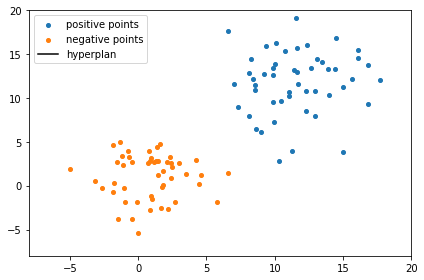

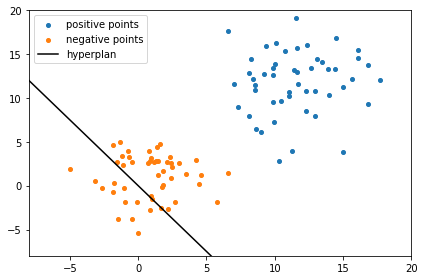

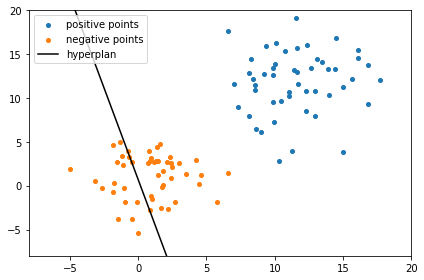

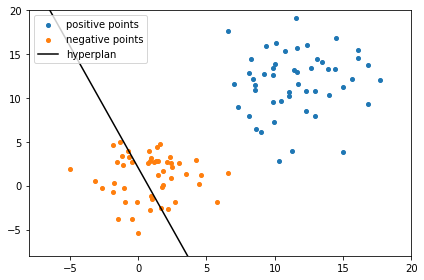

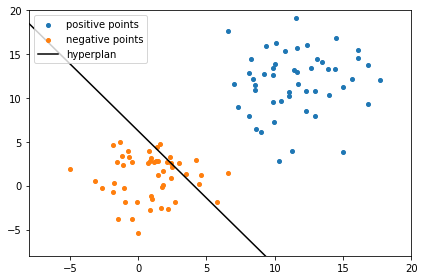

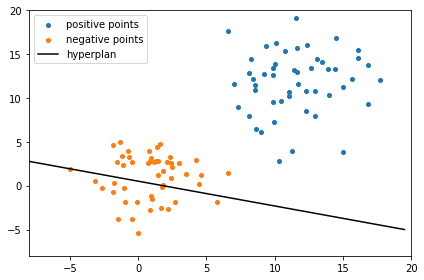

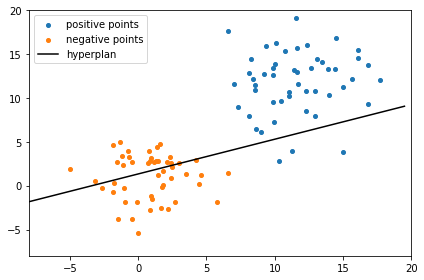

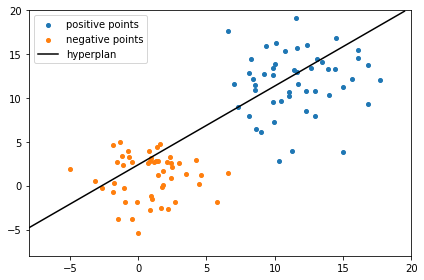

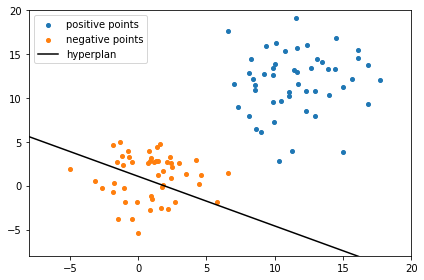

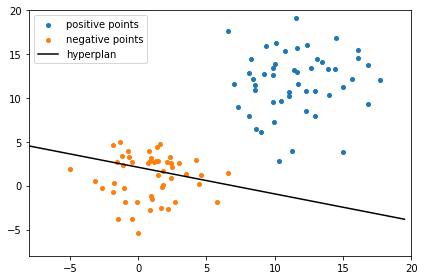

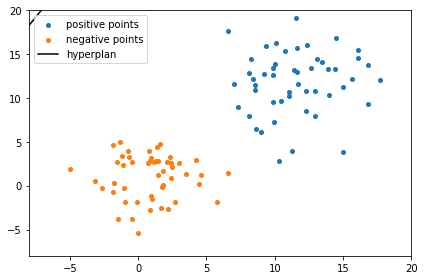

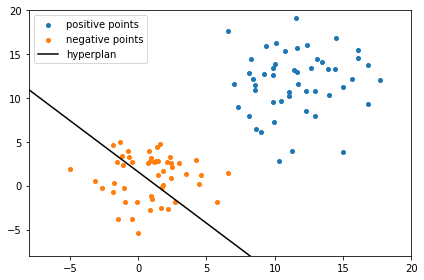

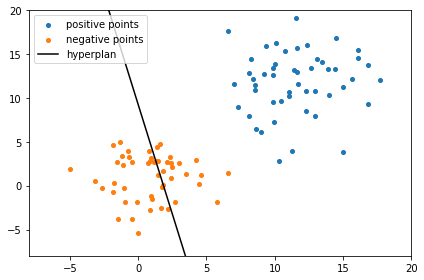

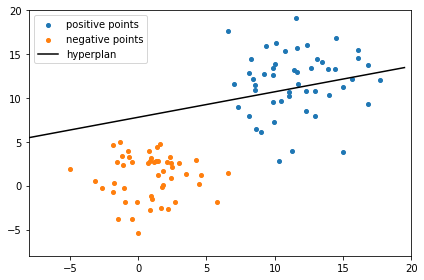

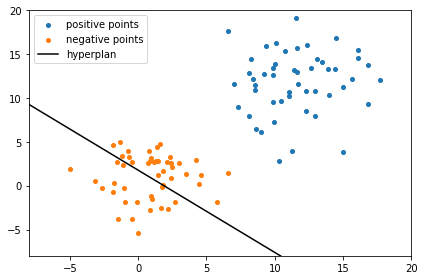

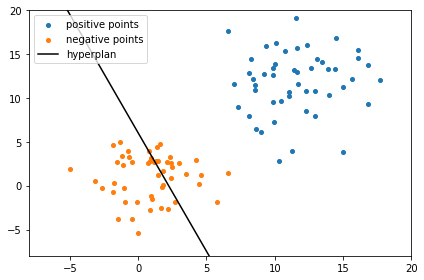

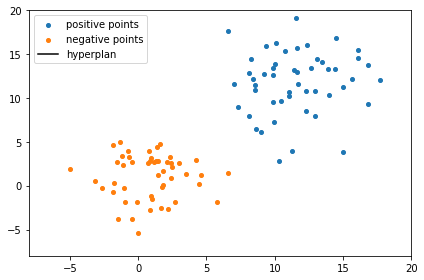

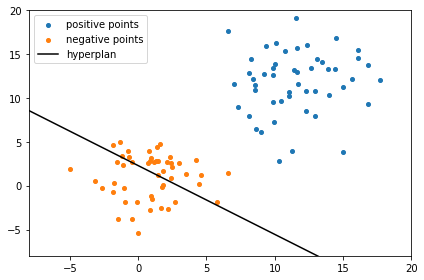

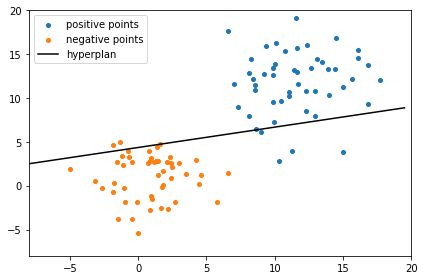

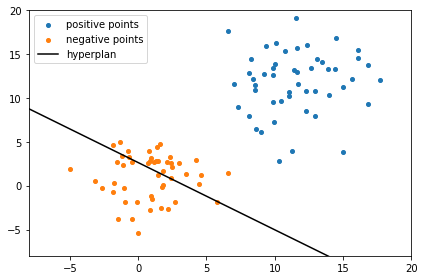

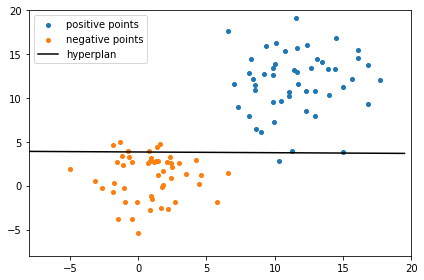

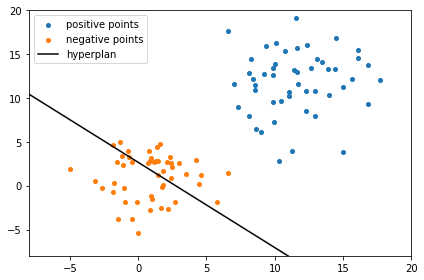

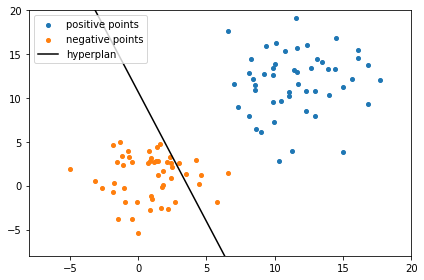

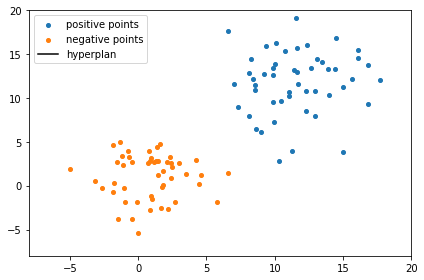

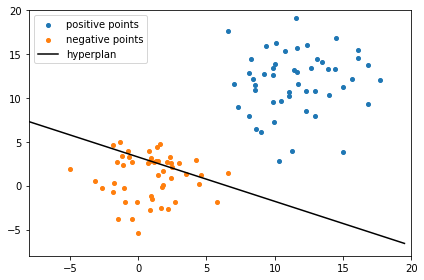

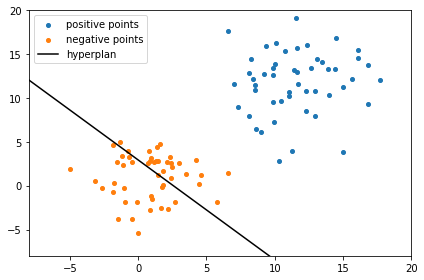

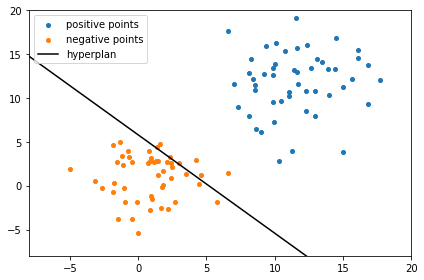

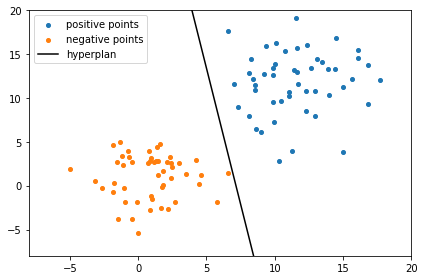

In [13]:
for i, w in enumerate(w_opt_l):
    
    if i % 2 == 0:
    
        plot_dataset(x_pos, y_pos, x_neg, y_neg, w, 
                     f"figures/training_{i}.pdf")
        plt.show()
        
plot_dataset(x_pos, y_pos, x_neg, y_neg, w_opt_l[-1], 
             "figures/training_final.pdf")
plt.show()